# mehrschichtiges Neuronales Netz in Tensorflow & Keras
https://keras.io/
![Image](./data/mnist2.png)

# Keras Python Machine Learning API importieren

In [115]:
import keras
keras.__version__

'2.15.0'

# importieren der gesamten MNIST Datenbank

In [116]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Ausgabe der Trainings- bzw. Testbilder

### Ausgabe der Shape (Form)

In [117]:
# output the shape of the data (also was is drinnen in den datensätzen)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


### Ausgabe der Dimension des Arrays (Bilder) mit `.nidm`

In [118]:
# output the dimension of the data
print(train_images.ndim)
print(test_images.ndim)

3
3


In [119]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [120]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Ausgabe der Trainings-Indizes:

In [121]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## NN erstellen

generell benötigen wir hierfür:

1. `Layer`

2. `Eingabedaten` 

3. `Verlustfunktion`

4. `Optimierer`

![Image](./data/nn.png)


### 0. Module (layers & models) importieren

* Module: https://www.tensorflow.org/api_docs/python/tf/keras
* z.B. models: https://www.tensorflow.org/api_docs/python/tf/keras/models

In [122]:
from keras import models
from keras import layers

### Initialisieren eines leeren Netzes
#### mit dem Modul `models` bestimmen wir im folgenden einen linearen Stapel von Schichten `(Sequential)`

In [123]:
network = models.Sequential()

### Layer definieren

#### Mit dem Argument `layers` definieren wir eine Liste von Layern, die dem Modell hinzugefügt werden sollen und legen die jewewiligen Attribute fest.

#### a) der input- und der hidden layer:

In [124]:
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))

+ `Dense` definiert einen layer in dem jeder Knoten mit jedem Knoten in der nachfolgenden verborgenen Schicht verbunden ist: `fully-connected Layer`
+ `input_shape` = Input layer mit 784 Eingabewerten, in unserem Falle also ein 2-D-Tensor mit 28*28 Werten
+ `activation` = Sigmoid-Aktivierungs-Funktion
+ `512` = definiert die größe des hidden layers

#### b) der output layer: 

In [125]:
network.add(layers.Dense(10, activation='softmax'))

+ `10` (fully-connected) Knoten


+ auf die die `softmax` funktion angewandt wird:

---
---

In [126]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### zum trainieren des Netzes benötigen wir noch weitere 3 Parameter :
+ `loss` Verlustfunktion E = S-K https://keras.io/losses/ https://keras.io/backend/#categorical_crossentropy
+ `optimizer` Gewichtsanpassung https://keras.io/optimizers/ https://keras.io/optimizers/#rmsprop
+ `metrics`, definiert den Anteil der Bilder, die korrekt klassifiziert wurden https://keras.io/metrics/

In [127]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Trainings- bzw. Testdaten vorbereiten, bzw. skalieren

von [0-255] in einen Interval von [0, 1] 

In [128]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

print("Label: ", test_labels[1])
test_images = test_images.reshape((10000, 28 * 28))
print("Datentyp before: ", test_images.dtype)
print(test_images[1])
test_images = test_images.astype('float32') / 255
print("Datentyp after: ", test_images.dtype)
print(test_images[1])

Label:  2
Datentyp before:  uint8
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 169 253 253 253 253
 253 253 218  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  52 250 253 210  32
  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31  18
   0   0   0   0 

---
---
##### Kodieren der Klassen (Ziffern) von 0 bis 9 - mit One-Hot-Kodierung

In [129]:
from keras.utils import to_categorical

print("Beispiel Label vor der Encodierung: ", train_labels[1])
print("Beispiel Label vor der Encodierung: ", train_labels[5])
train_labels = to_categorical(train_labels)
print("Beilspiel Label nach der Encodierung: ", train_labels[1])
print("Beispiel Label vor der Encodierung: ", train_labels[5])
test_labels = to_categorical(test_labels)

Beispiel Label vor der Encodierung:  0
Beispiel Label vor der Encodierung:  2
Beilspiel Label nach der Encodierung:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Beispiel Label vor der Encodierung:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


---
---
### Netz trainieren
+ `fit()` übergibt dem Modell (NN) die Numpy-Arrays der Eingabedaten `train_images` + Zielwerte `train_labels` 
+ `epochs` wie oft wir den gesamten Trainingssatz  durchlaufen möchten 
+ `batch_size`, Stapelgröße - wie viele Samples wir für eine Aktualisierung der Modellgewichte verwenden. 

In [130]:
history=network.fit(train_images, train_labels, epochs=20, batch_size=128)
history = network.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4603 - accuracy: 0.8760
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2689 - accuracy: 0.9218
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2172 - accuracy: 0.9369
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1773 - accuracy: 0.9484
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1477 - accuracy: 0.9567
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1245 - accuracy: 0.9641
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1075 - accuracy: 0.9688
Epoch 8/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0936 - accuracy: 0.9725
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9762
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0723 - accuracy: 0.9789

### Validierung durch Visualisierung des Trainingsdurchlaufs

+ `loss` Verlustfunktion
+ `acc` accuracy, Genauigkeit der Trainningsdaten, Korrektklassifizierungsrate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# render the loss and validation loss
#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.xlabel('epoch')
#plt.legend()
#plt.show()
#print("Abnahme des Fehlers, bzw. Anstieg der Genauigkeit über die Epochen")

### Evaluierung

In [132]:
# evaluate the model using the test data and print the accuracy
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss (Verlustrate):', test_loss)
print('test_acc (Korrektklassifzierungsrate):', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0609 - accuracy: 0.9825
test_loss (Verlustrate): 0.06090712919831276
test_acc (Korrektklassifzierungsrate): 0.9825000166893005


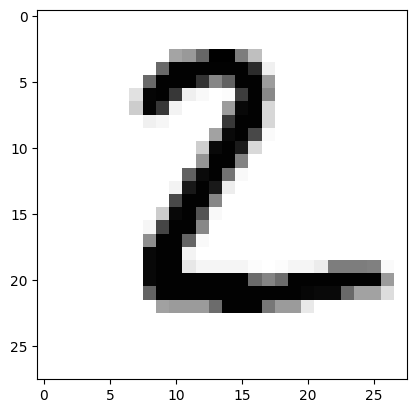

In [133]:
# show the second image in the test data
test_im = test_images[1]
plt.imshow(test_im.reshape(28,28), cmap='Greys')

In [ ]:
# plott the second image in the test data with the predicted label
predictions = network.predict(test_images)
print(predictions[1])

313/313 [==============================] - 1s 2ms/step
[8.2482438e-11 1.6682121e-08 9.9999958e-01 2.0683094e-08 1.4776265e-16
 1.6219235e-09 6.7379879e-09 1.8496983e-18 3.2358741e-07 3.1217357e-15]


In [ ]:
#print predicted label as integer
print(np.argmax(predictions[1]))

2


In [ ]:
#print test label
print(test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


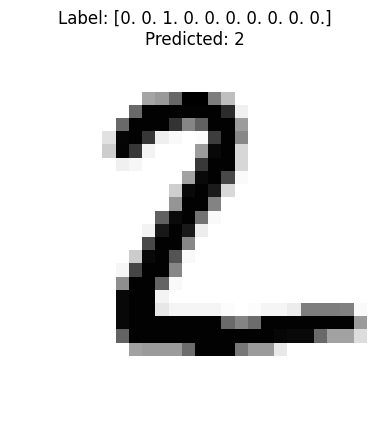

In [ ]:
#plott the predicted img

plt.imshow(test_im.reshape(28,28), cmap='Greys')
plt.title(f"Label: {test_labels[1]}\nPredicted: {np.argmax(predictions[1])}")
plt.axis('off')
plt.show()

In [ ]:
#Save model
network.save('mnist_trained_model.h5')  # creates a HDF5 file